In [1]:
'''IBM,MSFT,AAPL '''
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
data1 = pd.read_csv(r'C:\Users\LENOVO\Dropbox\My PC (DESKTOP-2IF49JC)\Desktop\AAPL.csv',index_col=0)#28 May 2020-2021
data2=pd.read_csv(r'C:\Users\LENOVO\Dropbox\My PC (DESKTOP-2IF49JC)\Desktop\MSFT.csv',index_col=0)
data3=pd.read_csv(r'C:\Users\LENOVO\Dropbox\My PC (DESKTOP-2IF49JC)\Desktop\IBM.csv',index_col=0)

<AxesSubplot:xlabel='Date'>

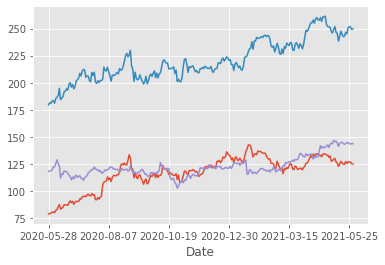

In [2]:
#there are a lot of different columns for different prices throughout the day, but we will only focus on the ‘Adj Close’ column. This colum gives us the closing price of company’s stock on the given day.
data1['Adj Close'].plot()
data2['Adj Close'].plot()
data3['Adj Close'].plot()

In [3]:
#Next, we calculate the percentage change in stock prices of tesla everyday. You will notice that that we take the log of percentage change.

#But take log?

#The reason for this is that log of the returns is time additive
apple= pd.DataFrame(data1, columns= ['Adj Close']).pct_change().apply(lambda x: np.log(1+x))
msft = pd.DataFrame(data2, columns= ['Adj Close']).pct_change().apply(lambda x: np.log(1+x))
ıbm = pd.DataFrame(data3, columns= ['Adj Close']).pct_change().apply(lambda x: np.log(1+x))
apple['Adj Close'] = apple['Adj Close'].fillna(0)
msft['Adj Close'] = msft['Adj Close'].fillna(0)
ıbm['Adj Close'] = ıbm['Adj Close'].fillna(0)
A=pd.concat([apple['Adj Close'],msft['Adj Close'],ıbm['Adj Close']],axis=1, ignore_index=True)#merged Adj colums for latter usage
A

,0,1,2
Date,,,
2020-05-28,0.000000,0.000000,0.000000
2020-05-29,-0.000974,0.010147,0.002967
2020-06-01,0.012223,-0.002295,-0.000080
2020-06-02,0.004619,0.011312,0.008849
2020-06-03,0.005490,0.002431,0.023918
...,...,...,...
2021-05-24,0.013226,0.022624,-0.000138
2021-05-25,-0.001575,0.003741,-0.006447
2021-05-26,-0.000394,-0.000914,-0.002855


In [4]:
#The variance in prices of stocks of Apple,MICROSOFT,IBM are an important indicator of how volatile this investment will be (how returns can fluctuate)
var_apple=apple.var()
var_msft=msft.var()
var_ıbm=ıbm.var()

In [5]:
#Volatility is measured as the standard deviation of a company’s stock.
#But volatility for the annual standard deviation. What we get from square root of variance is the daily standard deviation. To convert it to annual standard deviation we multiply the variance by 250.

#250 is used because there are 250 trading days in a year.
apple_vol = np.sqrt(var_apple * 250)
msft_vol = np.sqrt(var_msft * 250)
ıbm_vol = np.sqrt(var_ıbm * 250)
print(apple_vol,msft_vol,ıbm_vol)

Adj Close    0.34934
dtype: float64 Adj Close    0.276935
dtype: float64 Adj Close    0.277792
dtype: float64


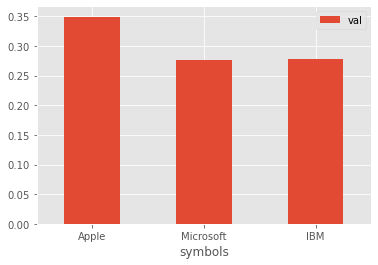

In [6]:
#We can plot the volatility of Apple,IBM,Microsoft for better visualization.
df = pd.DataFrame({'symbols':['Apple', 'Microsoft', 'IBM'], 'val':[0.34934,0.276935 , 0.277792]})
ax = df.plot.bar(x='symbols', y='val', rot=0)

In [7]:
#Covariance measures the directional relationship between the returns on two assets.
apple['Adj Close'].cov(msft['Adj Close'])
apple['Adj Close'].cov(ıbm['Adj Close'])
ıbm['Adj Close'].cov(msft['Adj Close'])

6.302580384282987e-05

In [8]:
'''Correlation, in the finance and investment industries, 
is a statistic that measures the degree to which two securities move in relation to each other. Correlations are used in advanced portfolio management, computed as the correlation coefficient, which has a value that must fall between -1.0 and +1.0.
A correlation of -1 means negative relation, i.e, if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.
A correlation of +1 means positive relation, i.e, if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.'''
apple['Adj Close'].corr(msft['Adj Close'])
apple['Adj Close'].corr(ıbm['Adj Close'])
ıbm['Adj Close'].corr(msft['Adj Close'])

0.20481418388773065

In [9]:
#For portfolio optimization to find the optimal values of weights that maximizes expected returns while minimizing the risk (standard deviation).
# Define weights for allocation
w = [0.2, 0.5,0.3]
e_r_ind_1 = apple['Adj Close'].mean()
e_r_ind_2= msft['Adj Close'].mean()
e_r_ind_3= ıbm['Adj Close'].mean()
# Total expected return
e_r = e_r_ind_1*w[0]+e_r_ind_2*w[1]+e_r_ind_3*w[2]

In [10]:
#Building an optimal risky portfolio
#I will be using stocks from 3 companies, namely, Apple, Microsoft, IBM  for a period of 1 years.
#Just like earlier, I will only keep the ‘Adj Close’ column to perform our calculations.
A=pd.concat([apple['Adj Close'],msft['Adj Close'],ıbm['Adj Close']],axis=1, ignore_index=True)
A.head()

,0,1,2
Date,,,
2020-05-28,0.000000,0.000000,0.000000
2020-05-29,-0.000974,0.010147,0.002967
2020-06-01,0.012223,-0.002295,-0.000080
2020-06-02,0.004619,0.011312,0.008849
2020-06-03,0.005490,0.002431,0.023918


In [11]:
# Log of percentage change
cov_matrix = A.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,0,1,2
0,2.561325,0.844705,-0.357059
1,0.844705,2.733562,-0.147754
2,-0.357059,-0.147754,2.673832


In [12]:
corr_matrix = A.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,0,1,2
0,1.000000,0.320693,-0.112751
1,0.320693,1.000000,-0.052192
2,-0.112751,-0.052192,1.000000


In [13]:
# Randomly weighted portfolio's variance
w = {'AAPL': 0.3, 'MSFT': 0.2, 'IBM': 0.5}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.0

In [23]:
# Monthly returns for individual companies
ind_er=A.resample('M', convention='end').asfreq()
ind_er

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
# Portfolio returns
w = [0.2, 0.5, 0.3]
port_er = (w*ind_er).sum()
port_er

In [ ]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = A.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

In [ ]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

In [ ]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [ ]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its weights                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [ ]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]


In [ ]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

In [ ]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])